In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('/Users/revu/Desktop/DATA SCIENCE/housepred_technohack.csv')

In [3]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [42]:
dtypes=data.dtypes
dtypes

date             float64
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

## Missing Data Analysis

In [7]:
data.isnull().sum()    #NO DATA IS MISSING

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
dict1=dict(dtypes)
cat=[i for i in dict1 if dict1[i]=='O']
num=[i for i in dict1 if dict1[i]!='O']

In [9]:
print(cat)
print(num)

['date']
['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [10]:
for i in cat:
    print(i,data[i].nunique())

date 372


In [11]:
for i in num:
    print(i,data[i].nunique())

id 21436
price 4028
bedrooms 13
bathrooms 30
sqft_living 1038
sqft_lot 9782
floors 6
waterfront 2
view 5
condition 5
grade 12
sqft_above 946
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
lat 5034
long 752
sqft_living15 777
sqft_lot15 8689


## Dropping id column

In [12]:
data.drop('id',axis=1,inplace=True)
data.drop('lat',axis=1,inplace=True)
data.drop('long',axis=1,inplace=True)

## Converting categorical column to numerical  column

In [13]:
cat

['date']

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['date']=le.fit_transform(data['date'])

In [15]:
dict1=dict(data.dtypes)
num=[i for i in dict1 if dict1[i]!='o']
num

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15']

In [16]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,164,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,220,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,290,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,220,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,283,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
5,10,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,4760,101930
6,56,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,2238,6819
7,251,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,1650,9711
8,339,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,1780,8113
9,305,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,2390,7570


## Exploratory Data Analysis

** Counting number of houses with unique floors **

In [17]:
data['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## Histogram

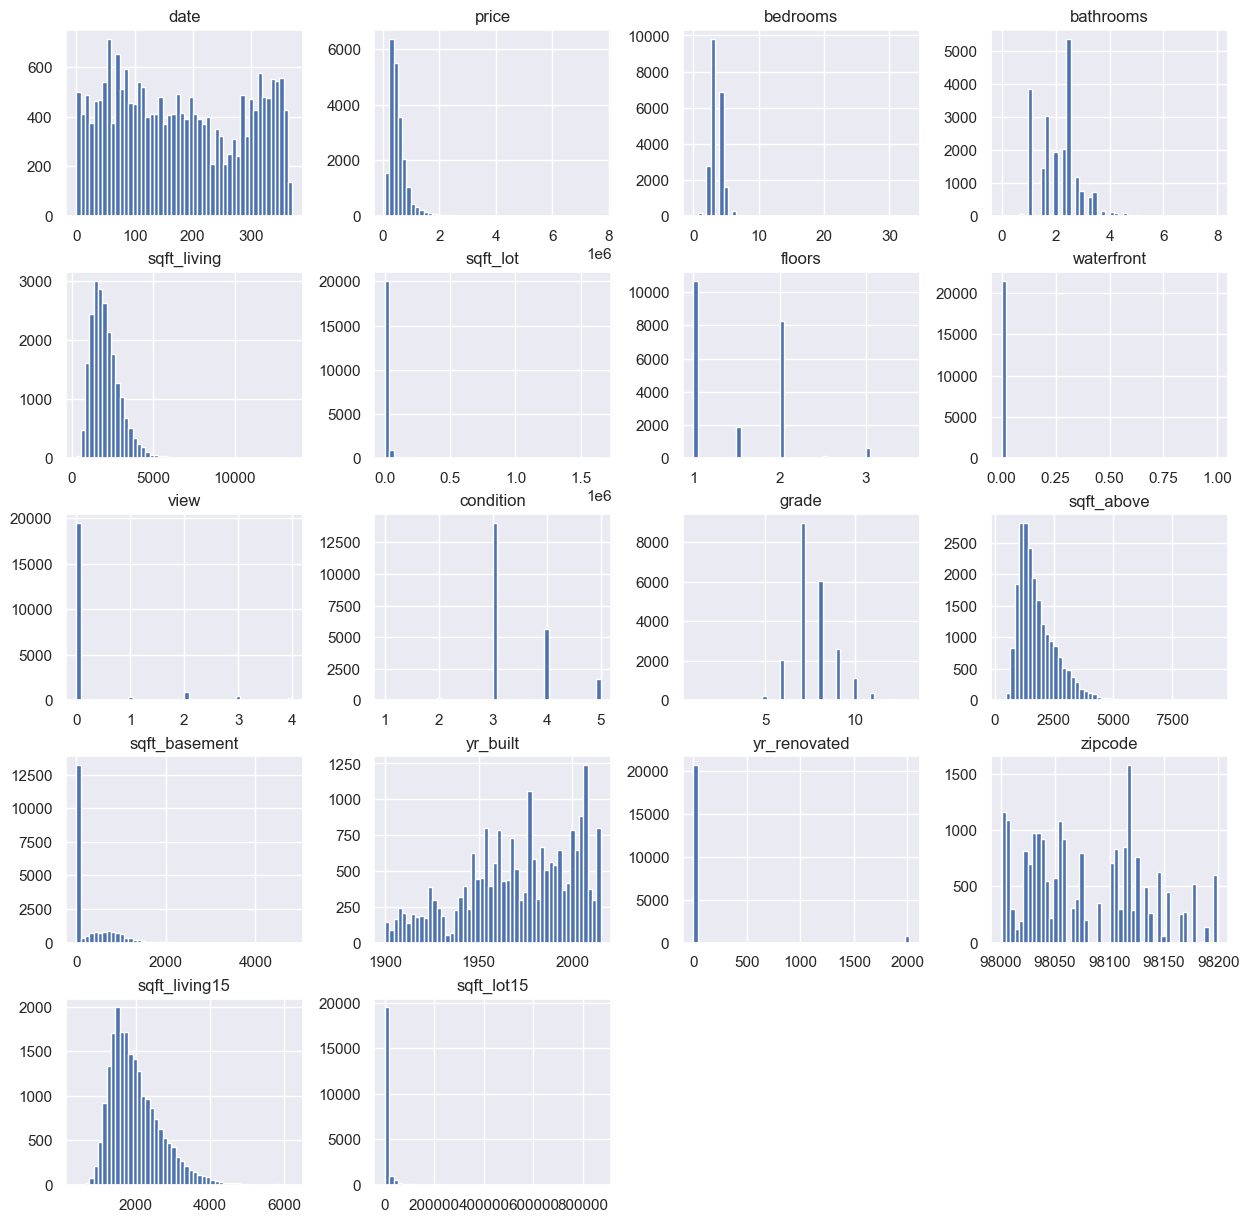

In [18]:
data.hist(bins=50,figsize=(15,15))
plt.show()

## Determining houses with or without waterfront has   more outliers

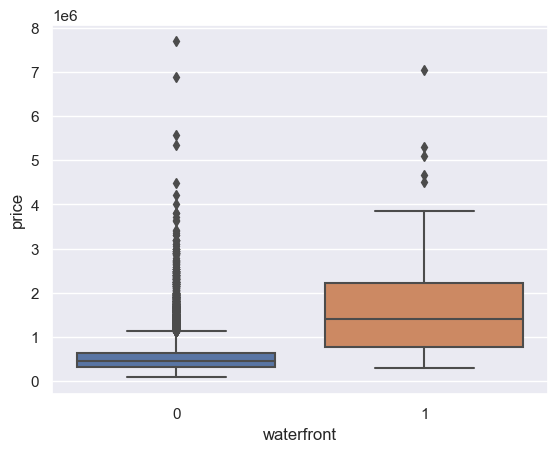

In [19]:
sns.boxplot(data=data,x='waterfront',y='price')
plt.show()

## Let us determine how is sqft_above correlated with the price

<Axes: xlabel='sqft_above', ylabel='price'>

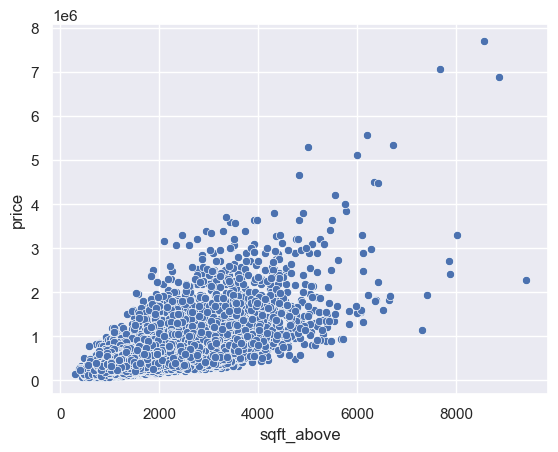

In [20]:
sns.scatterplot(data=data,x='sqft_above',y='price')

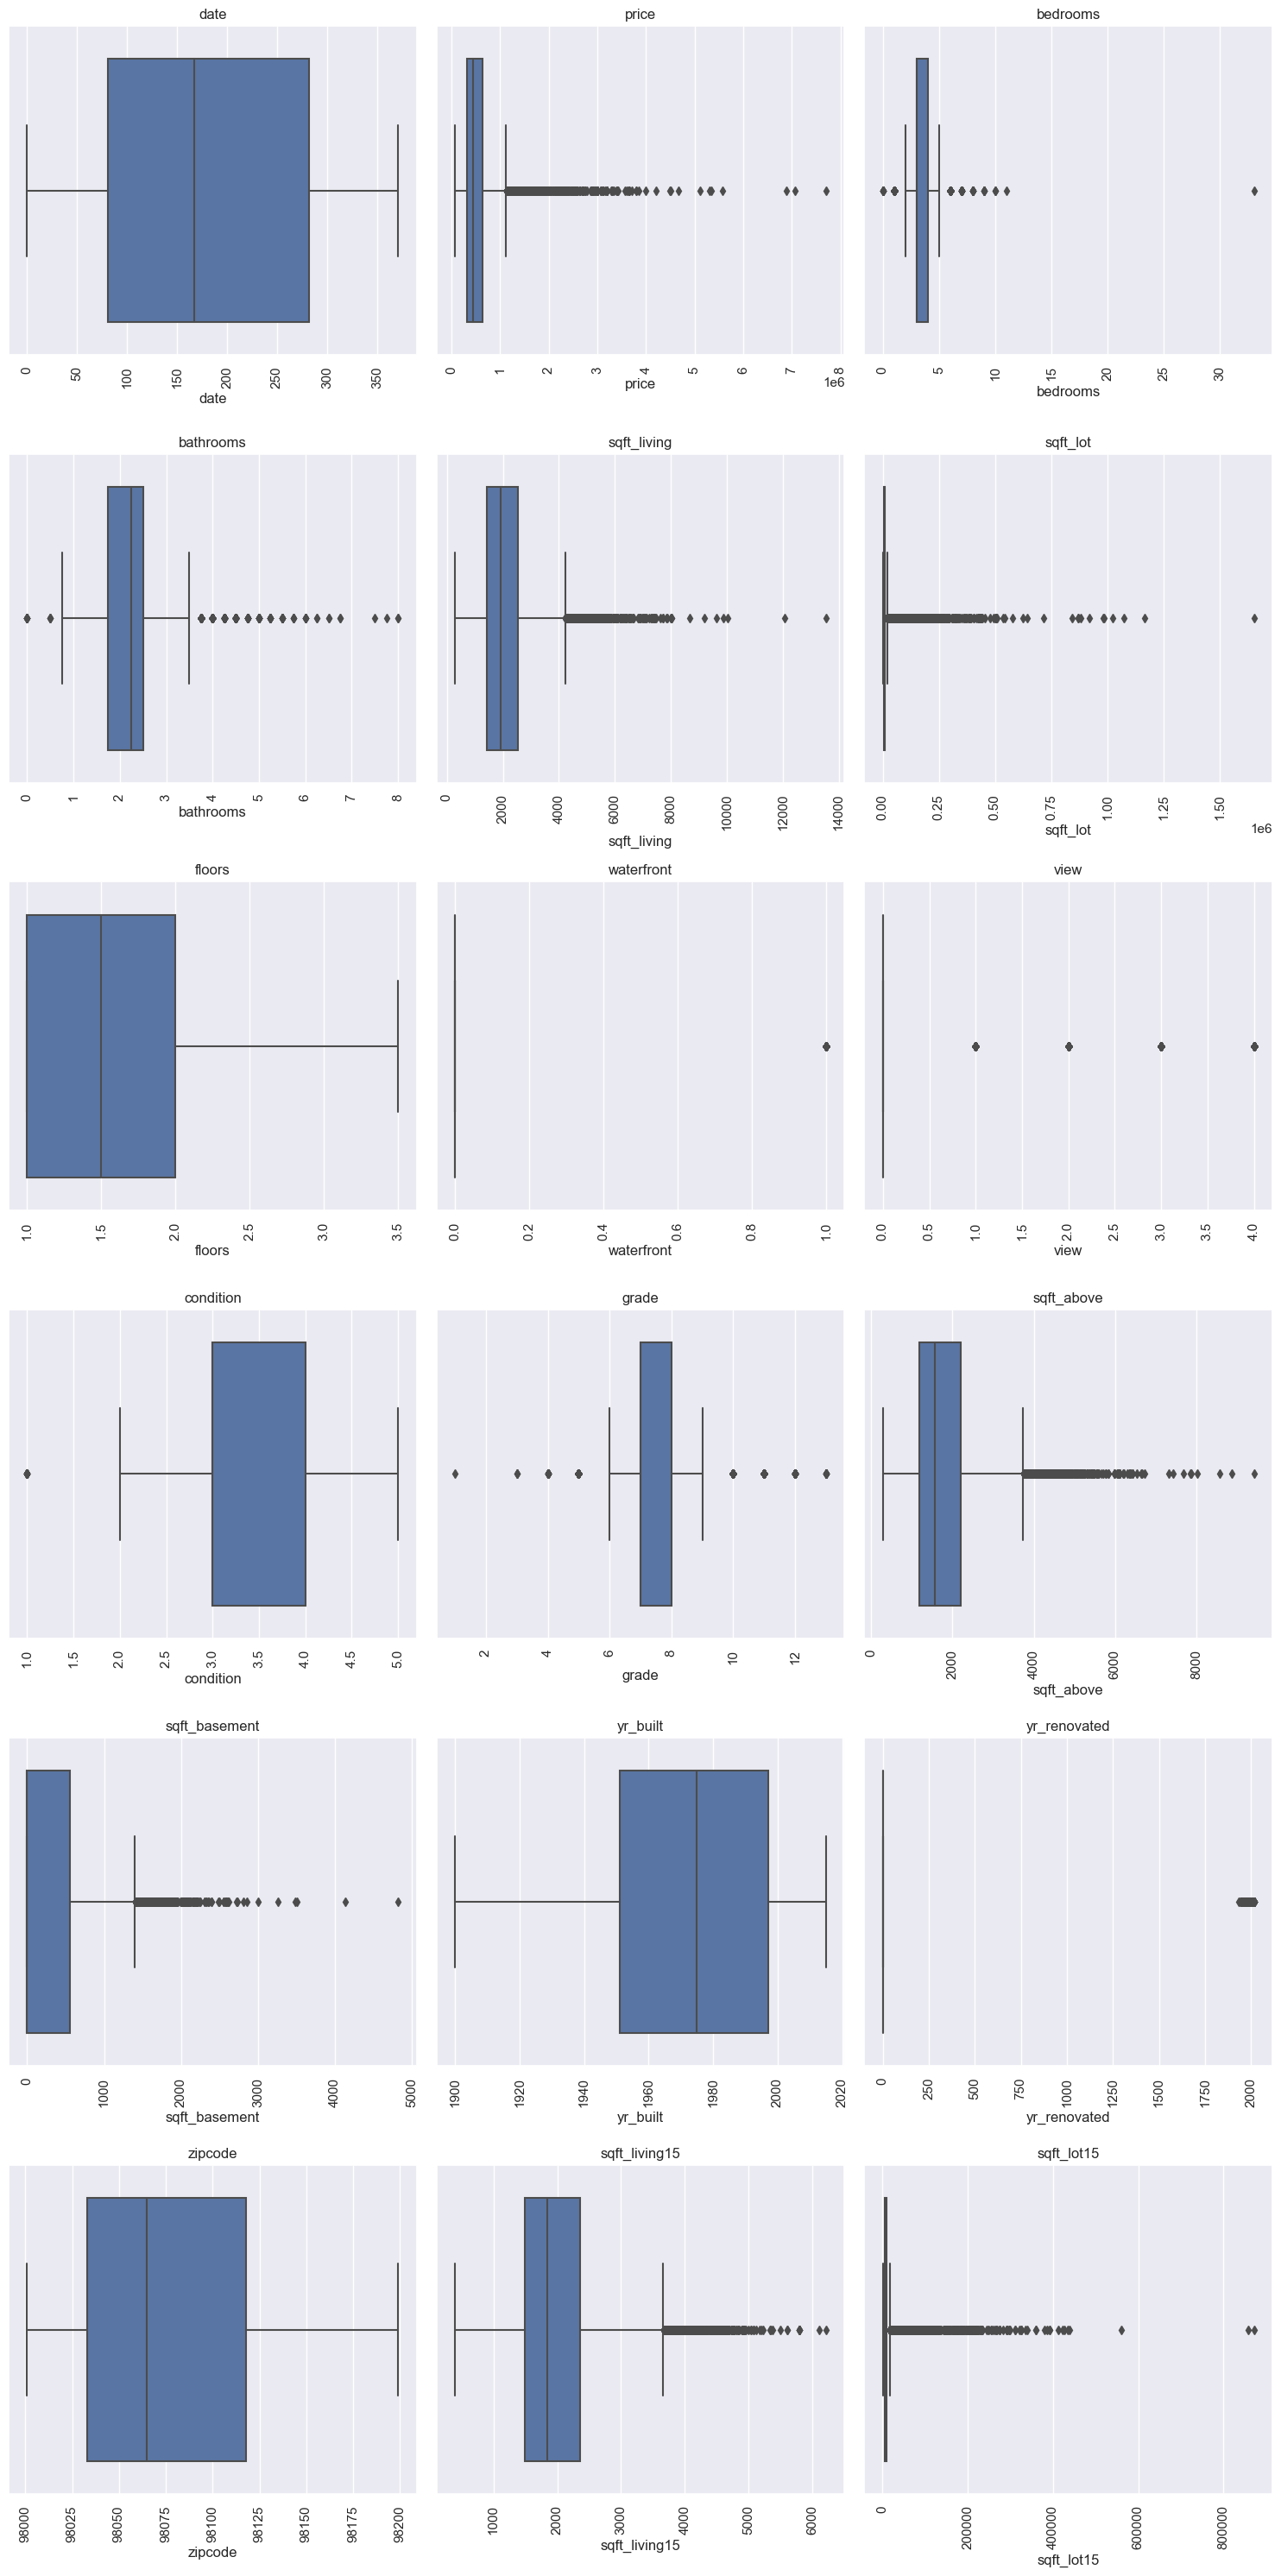

In [21]:
num_cols=len(num)
num_rows=(num_cols+2)//3
fig,axs=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
axs=axs.flatten()
for i,item in enumerate(num):
    sns.boxplot(data=data,x=data[item],ax=axs[i])
    axs[i].set_title(item)
    axs[i].tick_params(axis='x',rotation=90)
if num_cols<len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

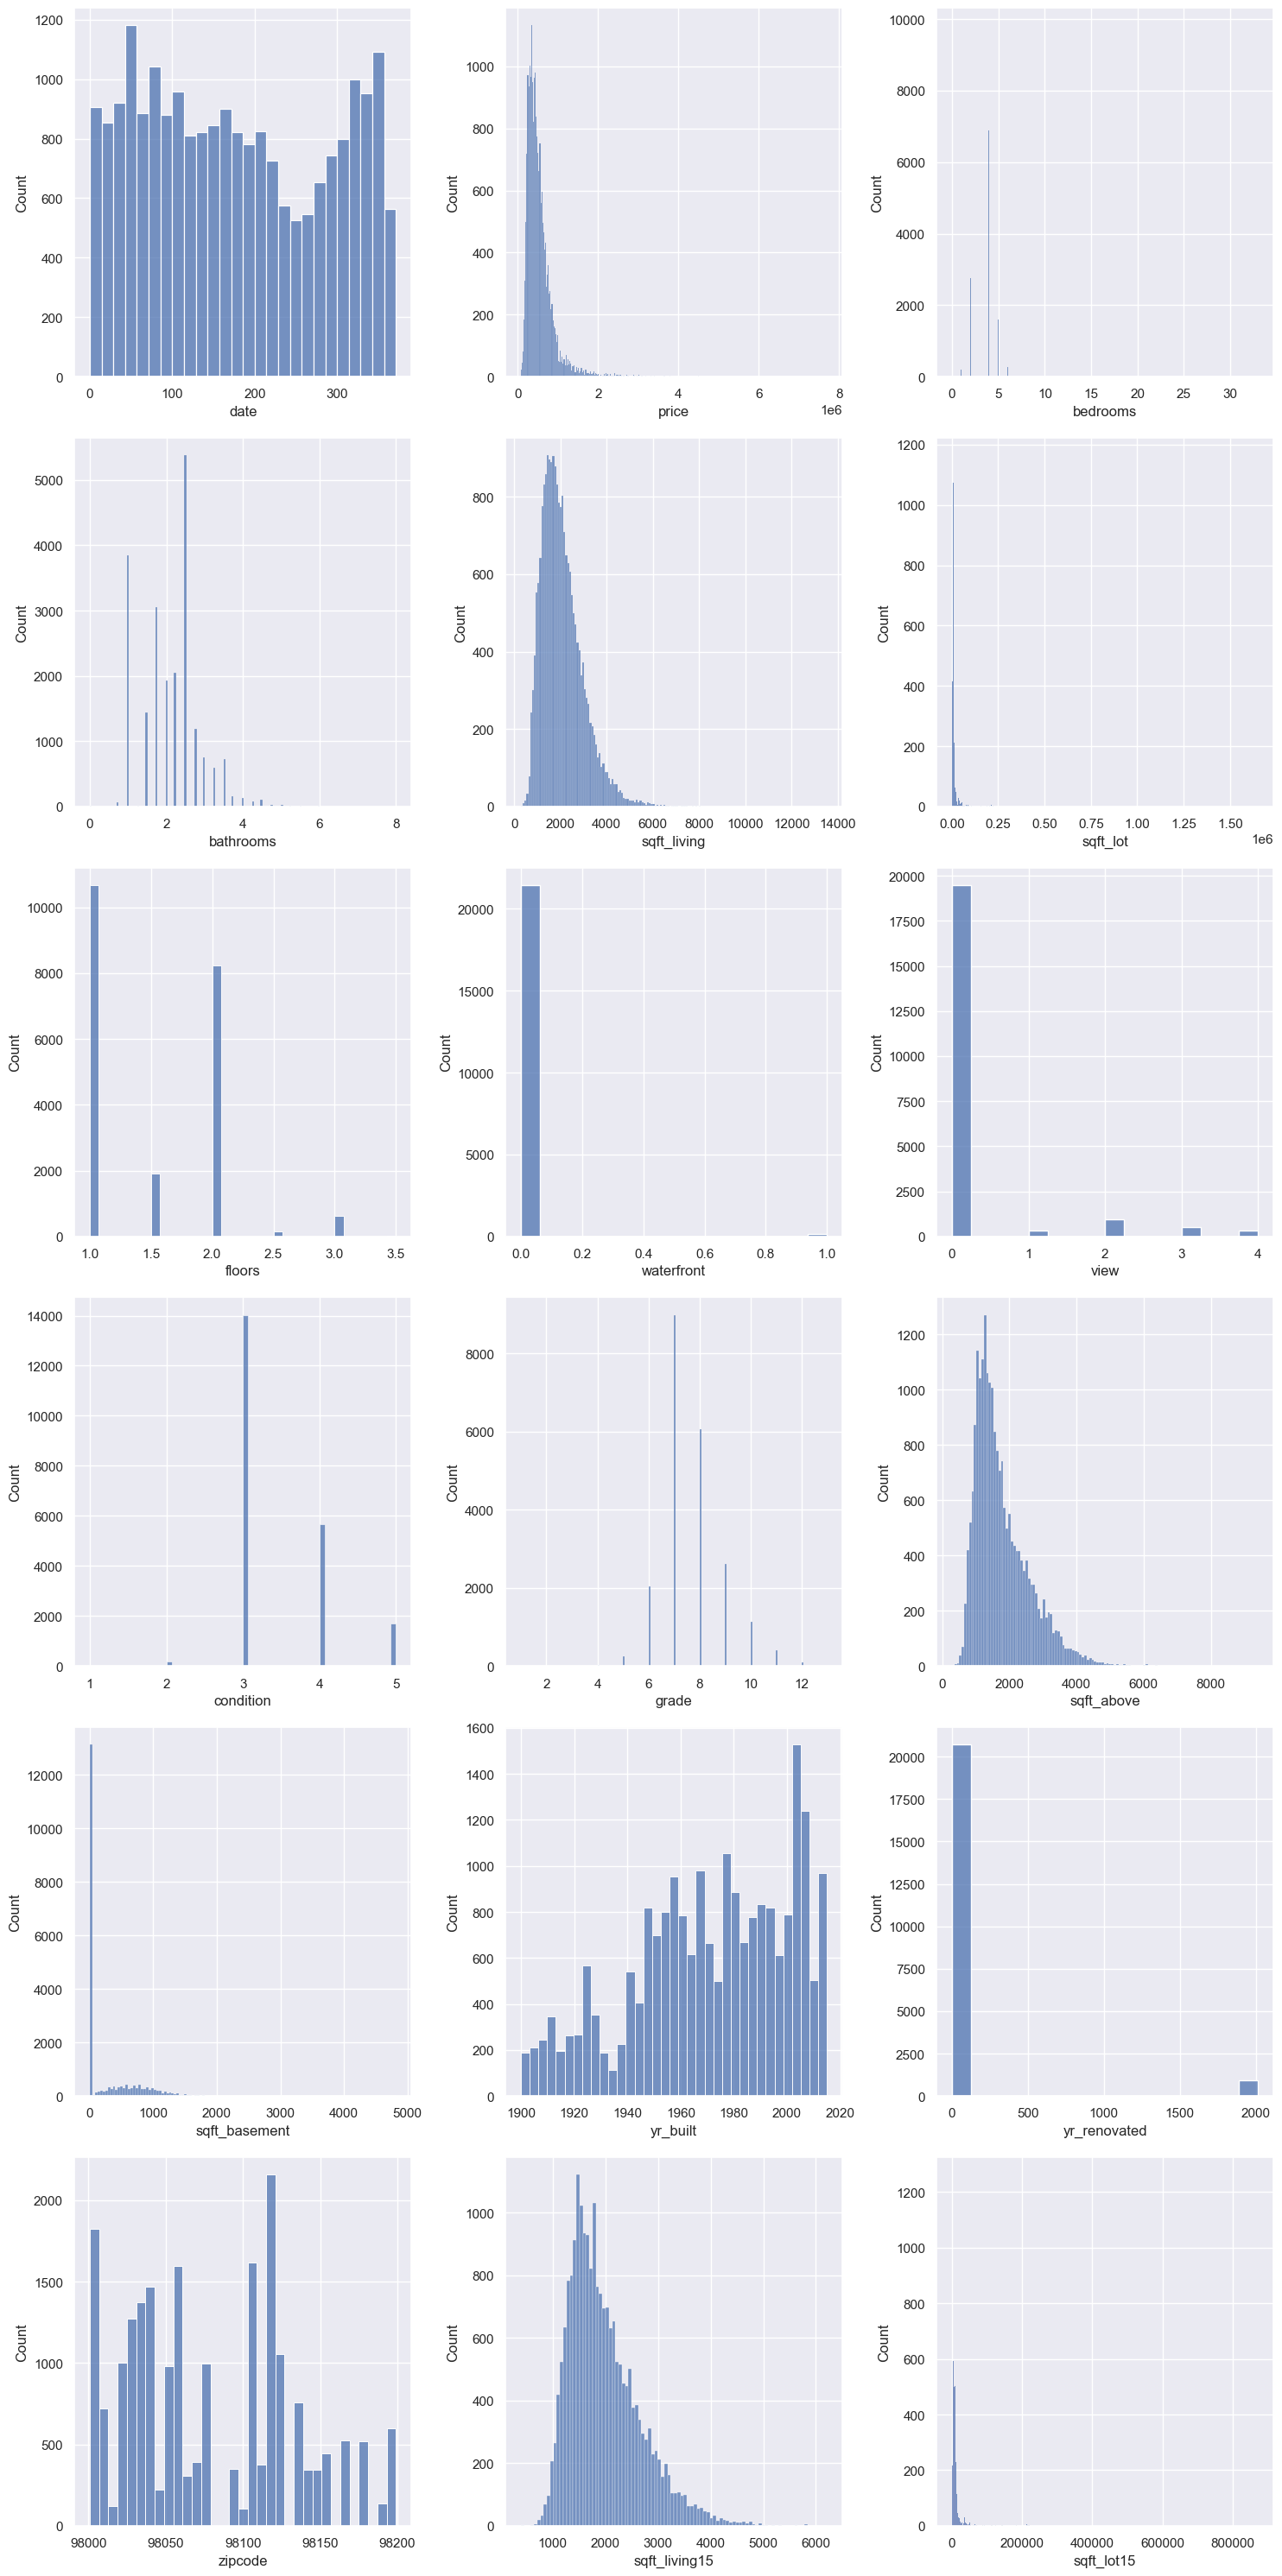

In [22]:
num_col=len(num)
num_row=(num_col+2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()
for i, item in enumerate(num):
    sns.histplot(data=data,x=item,ax=axs[i])
if num_cols<len(axs):
    for i in range(num_col,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

## EDA ==>for all numerical data==>Outlier Analysis

In [23]:
for i in num:
    mean=round(np.mean(data[i]),2)
    std=round(np.std(data[i]),2)
    print(f" *****************{i}******************")
    plus1=mean+std
    min1=mean-std
    con1=data[i]>min1
    con2=data[i]<plus1
    con=con1&con2
    per1=len(data[con1&con2])*100/len(data)
    print(f"{per1} of data falls within 1 standard deviation")
    plus1=mean+(2*std)
    min1=mean-(2*std)
    con1=data[i]>min1
    con2=data[i]<plus1
    con=con1&con2
    per1=len(data[con1&con2])*100/len(data)
    print(f"{per1} of data falls within 2 standard deviation")
    plus1=mean+(3*std)
    min1=mean-(3*std)
    con1=data[i]>min1
    con2=data[i]<plus1
    con=con1&con2
    per1=len(data[con1&con2])*100/len(data)
    print(f"{per1} of data falls within 3 standard deviation")
    print("************************")

 *****************date******************
55.61930319714986 of data falls within 1 standard deviation
100.0 of data falls within 2 standard deviation
100.0 of data falls within 3 standard deviation
************************
 *****************price******************
88.90019895433304 of data falls within 1 standard deviation
96.09956970341923 of data falls within 2 standard deviation
98.12150094850321 of data falls within 3 standard deviation
************************
 *****************bedrooms******************
77.2960718086337 of data falls within 1 standard deviation
97.47374265488364 of data falls within 2 standard deviation
99.65298662841808 of data falls within 3 standard deviation
************************
 *****************bathrooms******************
69.56924073474298 of data falls within 1 standard deviation
97.358071531023 of data falls within 2 standard deviation
99.13477999352241 of data falls within 3 standard deviation
************************
 *****************sqft_living****

In [24]:
for i in num[2:]:
    mean=np.mean(data[i])
    std=np.std(data[i])
    plus1=mean+(3*std)
    min1=mean-(3*std)
    data[i]=np.where((data[i]>plus1)|(data[i]<min1),mean,data[i])

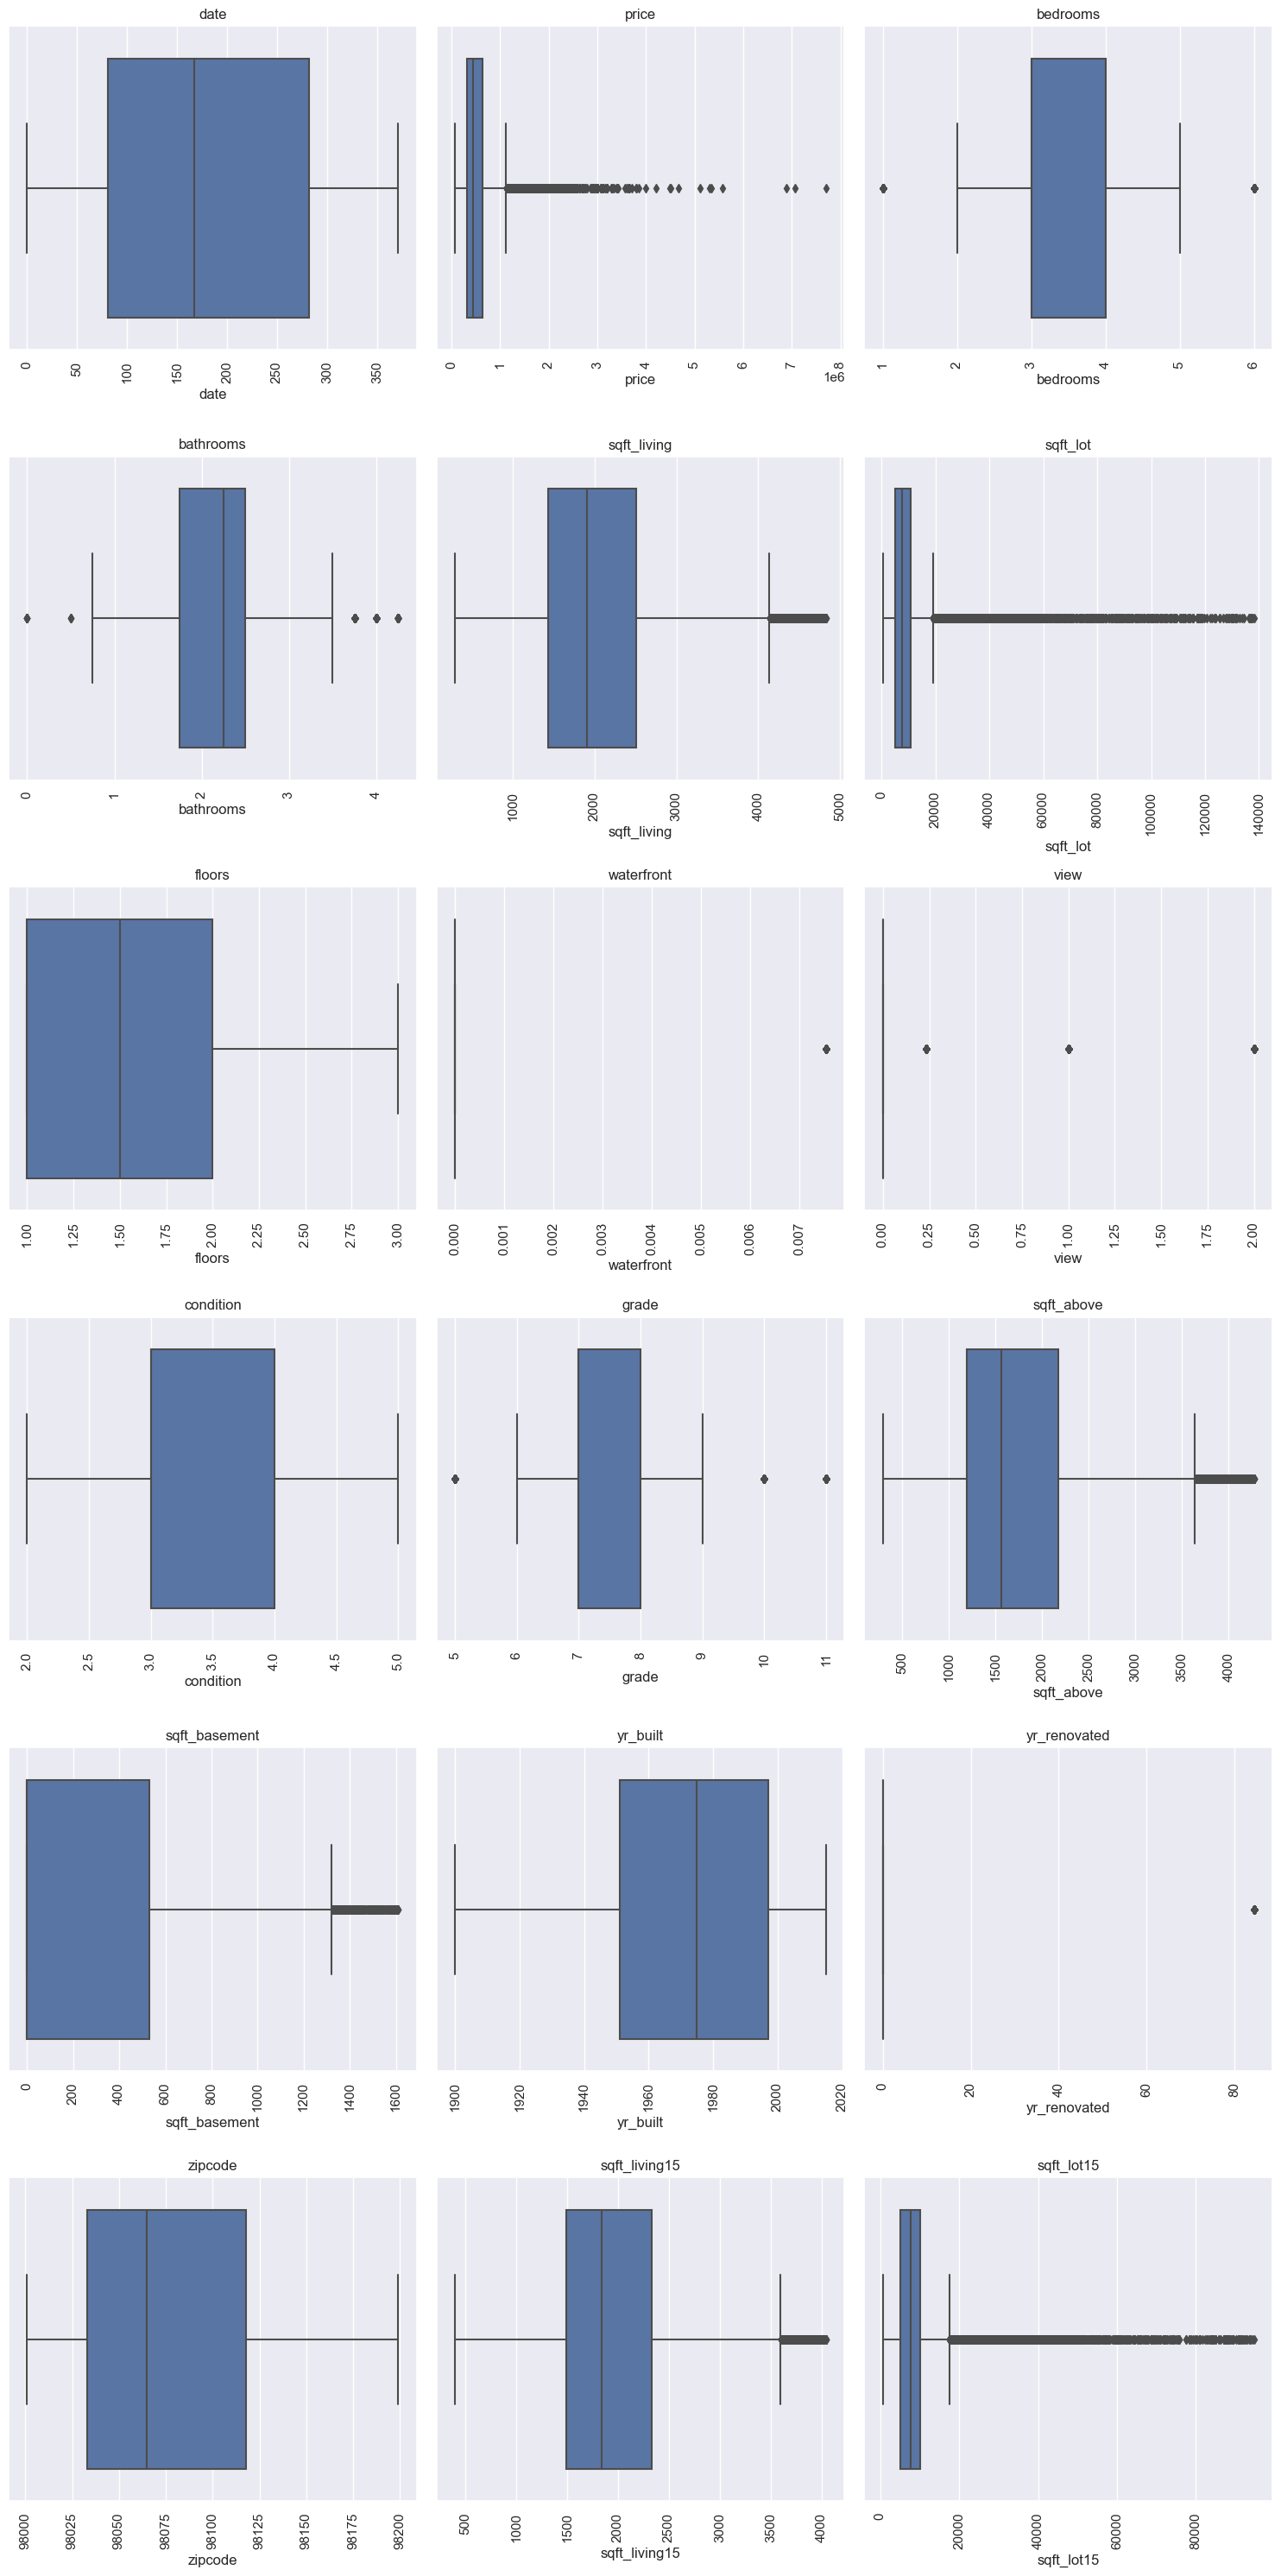

In [25]:
num_cols=len(num)
num_rows=(num_cols+2)//3
fig,axs=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
axs=axs.flatten()
for i,item in enumerate(num):
    sns.boxplot(data=data,x=data[item],ax=axs[i])
    axs[i].set_title(item)
    axs[i].tick_params(axis='x',rotation=90)
if num_cols<len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

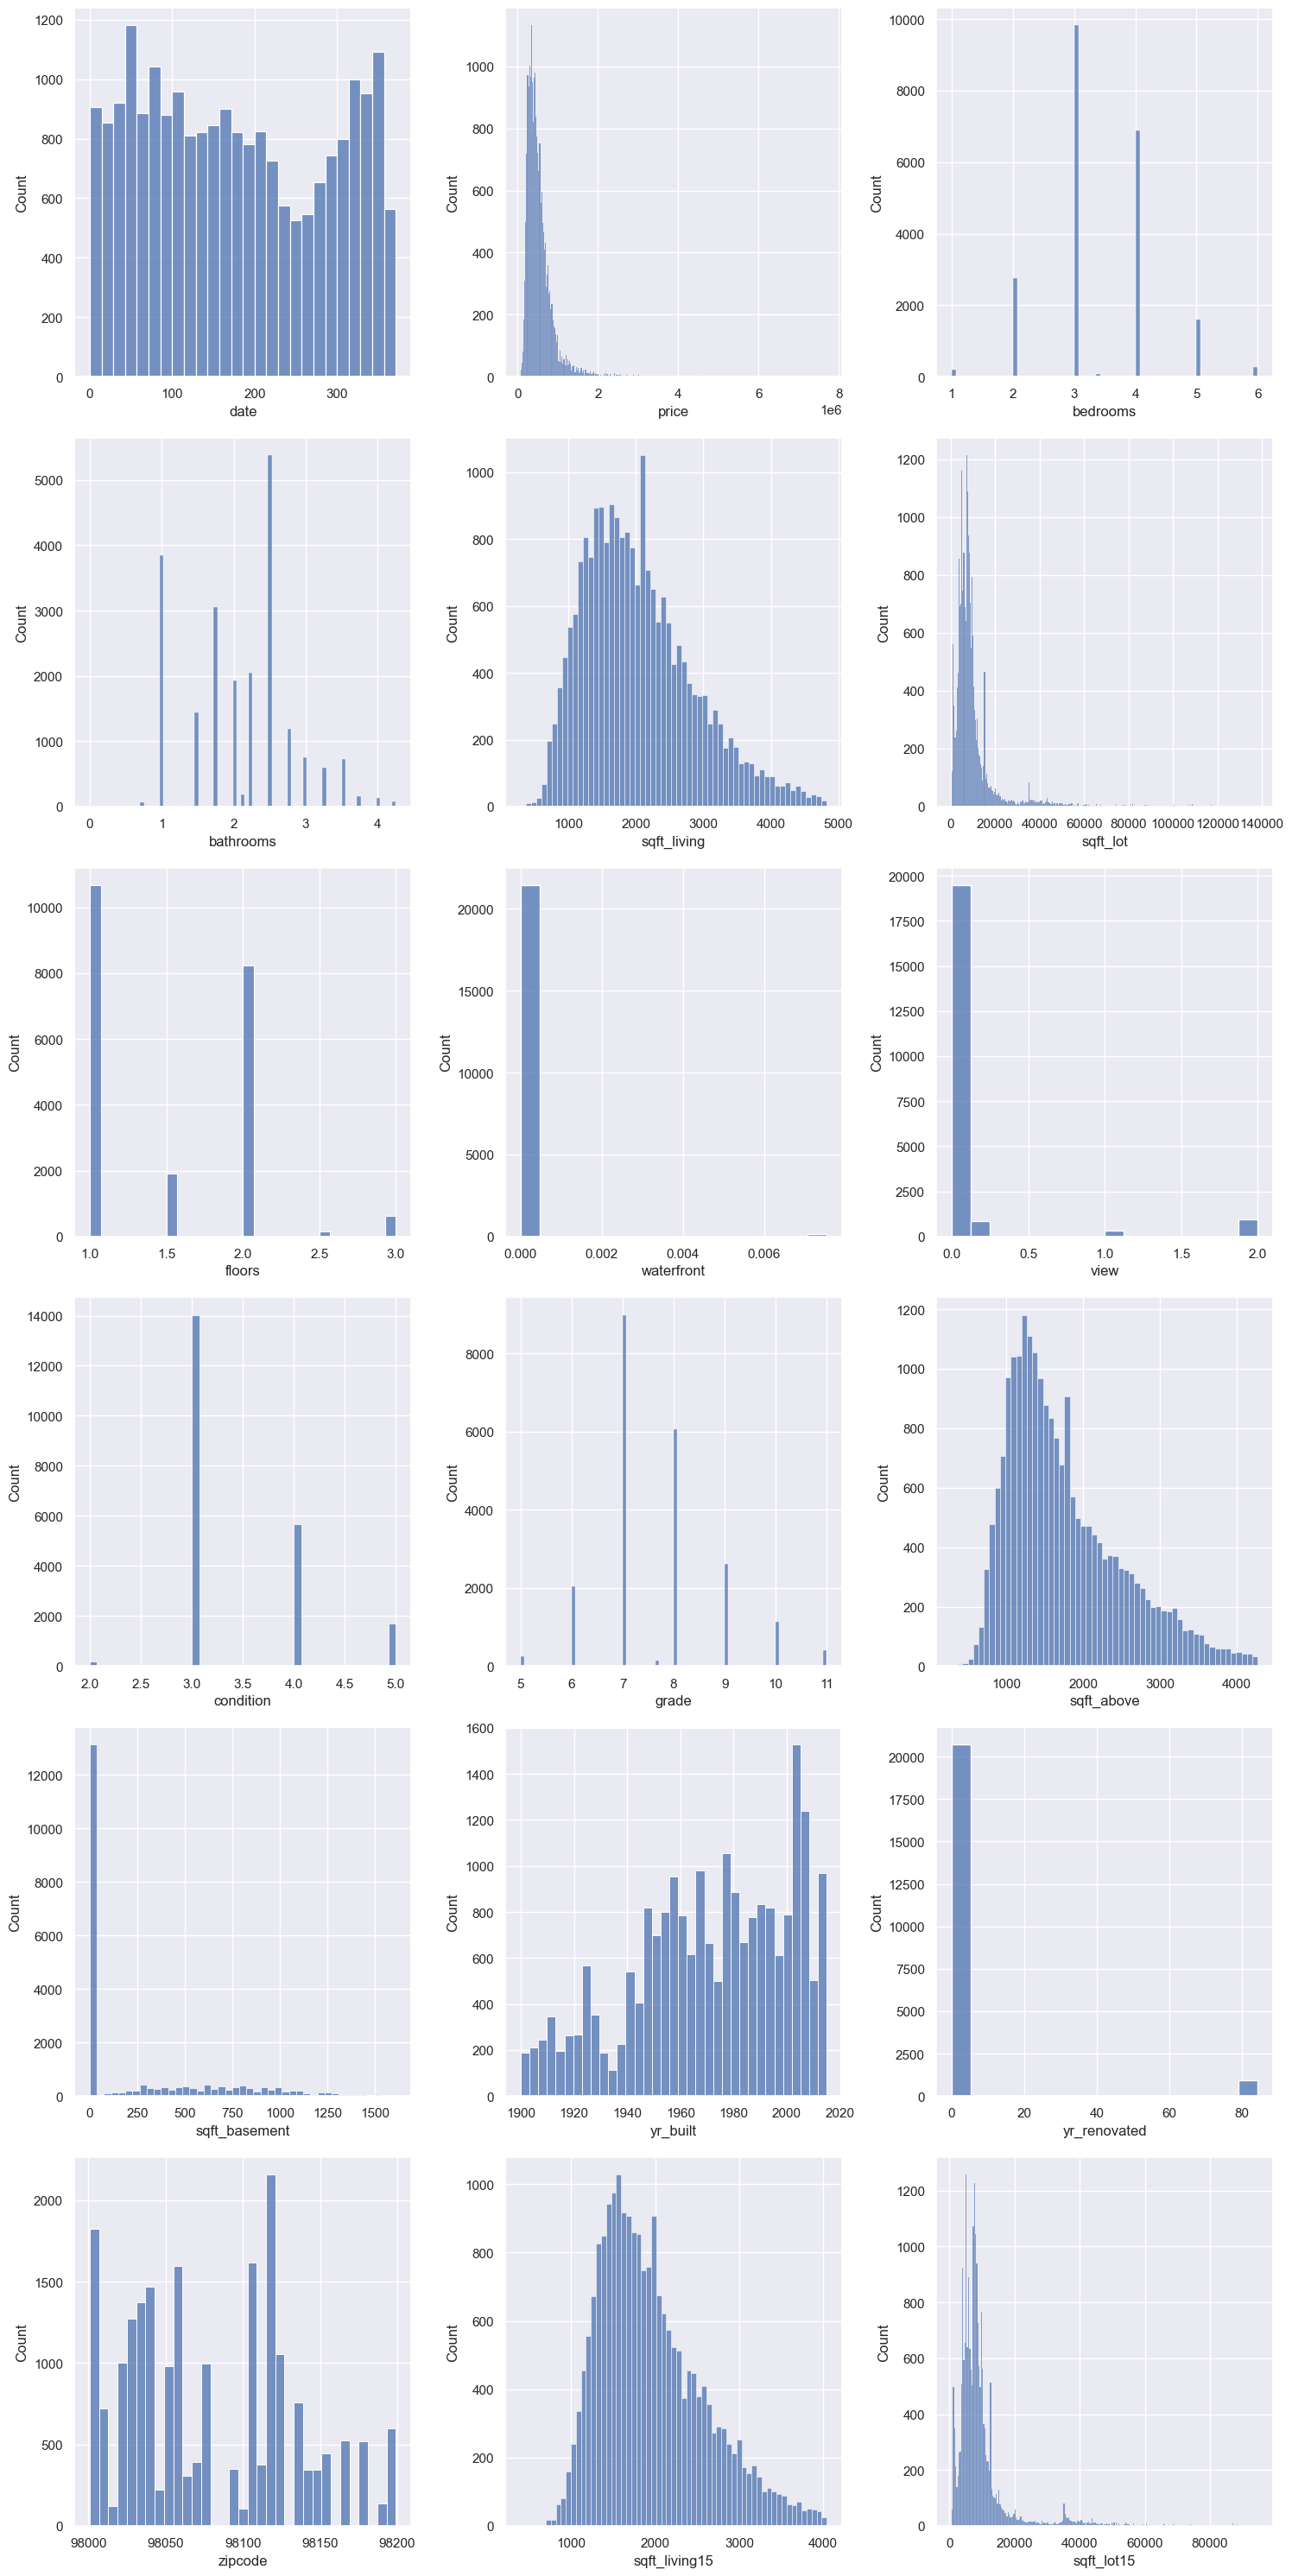

In [26]:
num_col=len(num)
num_row=(num_col+2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()
for i, item in enumerate(num):
    sns.histplot(data=data,x=item,ax=axs[i])
if num_cols<len(axs):
    for i in range(num_col,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

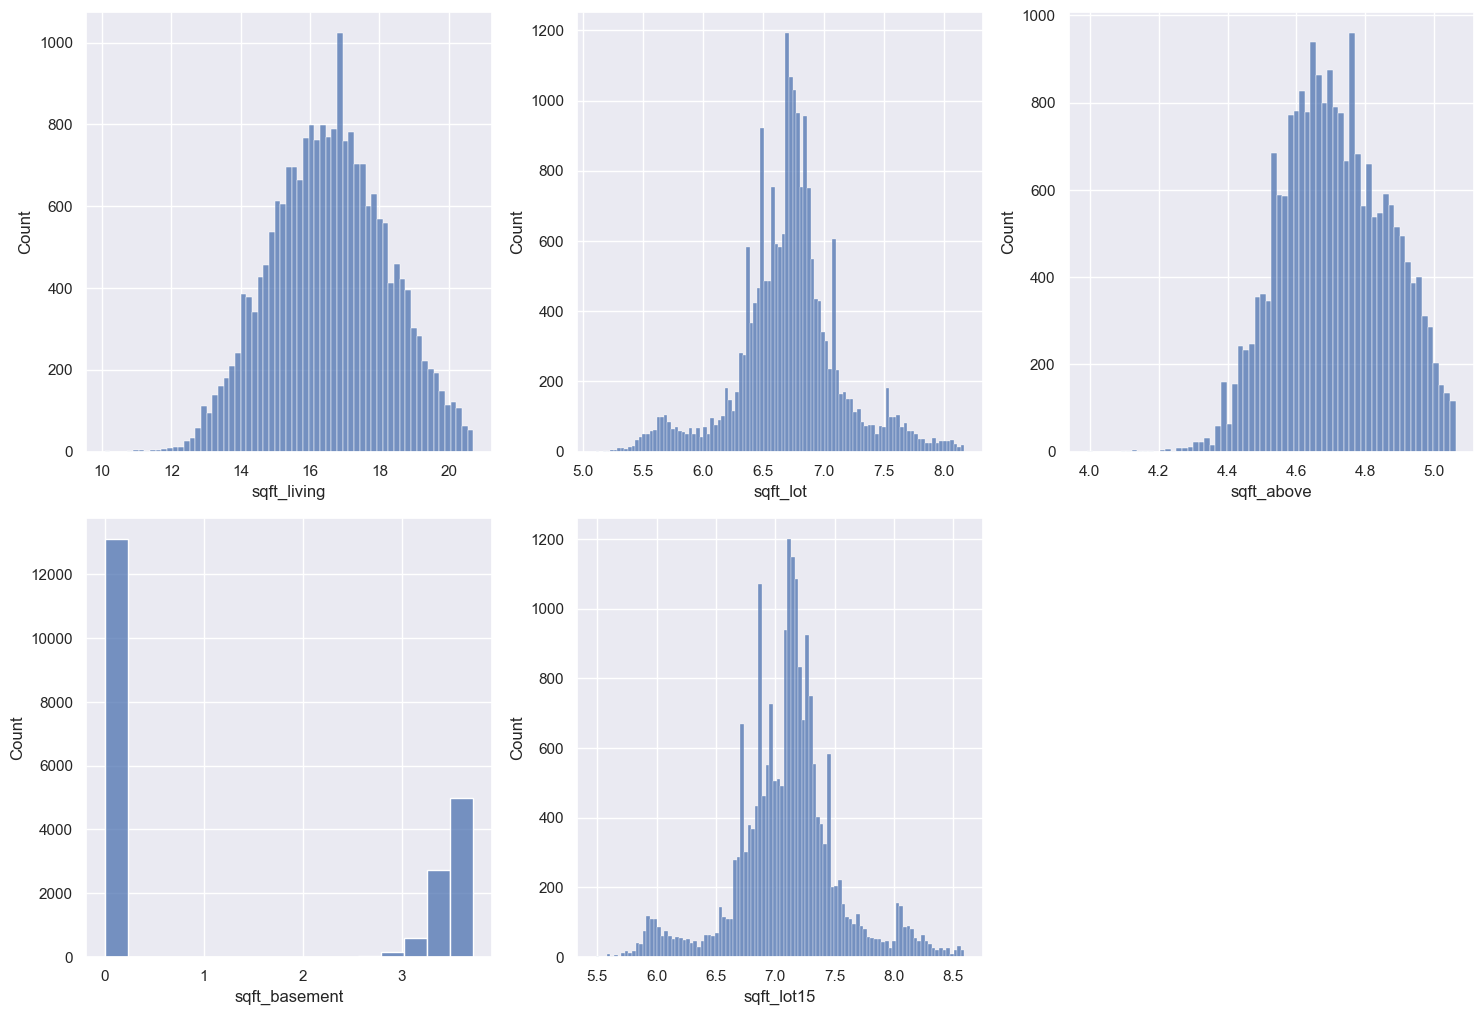

In [27]:
from scipy.stats import boxcox
selected_columns=['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_lot15']
num_col=len(selected_columns)
num_rows=num_col+2//3
fig,axs=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
axs=axs.flatten()
for i,item in enumerate(selected_columns):
    data[item], _ = boxcox(data[item] + 1)  # Adding 1 to avoid zero values
      # Adding 1 to avoid zero values
    sns.histplot(data=data,x=data[item],ax=axs[i])
if num_col<len(axs):
    for i in range(num_col,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

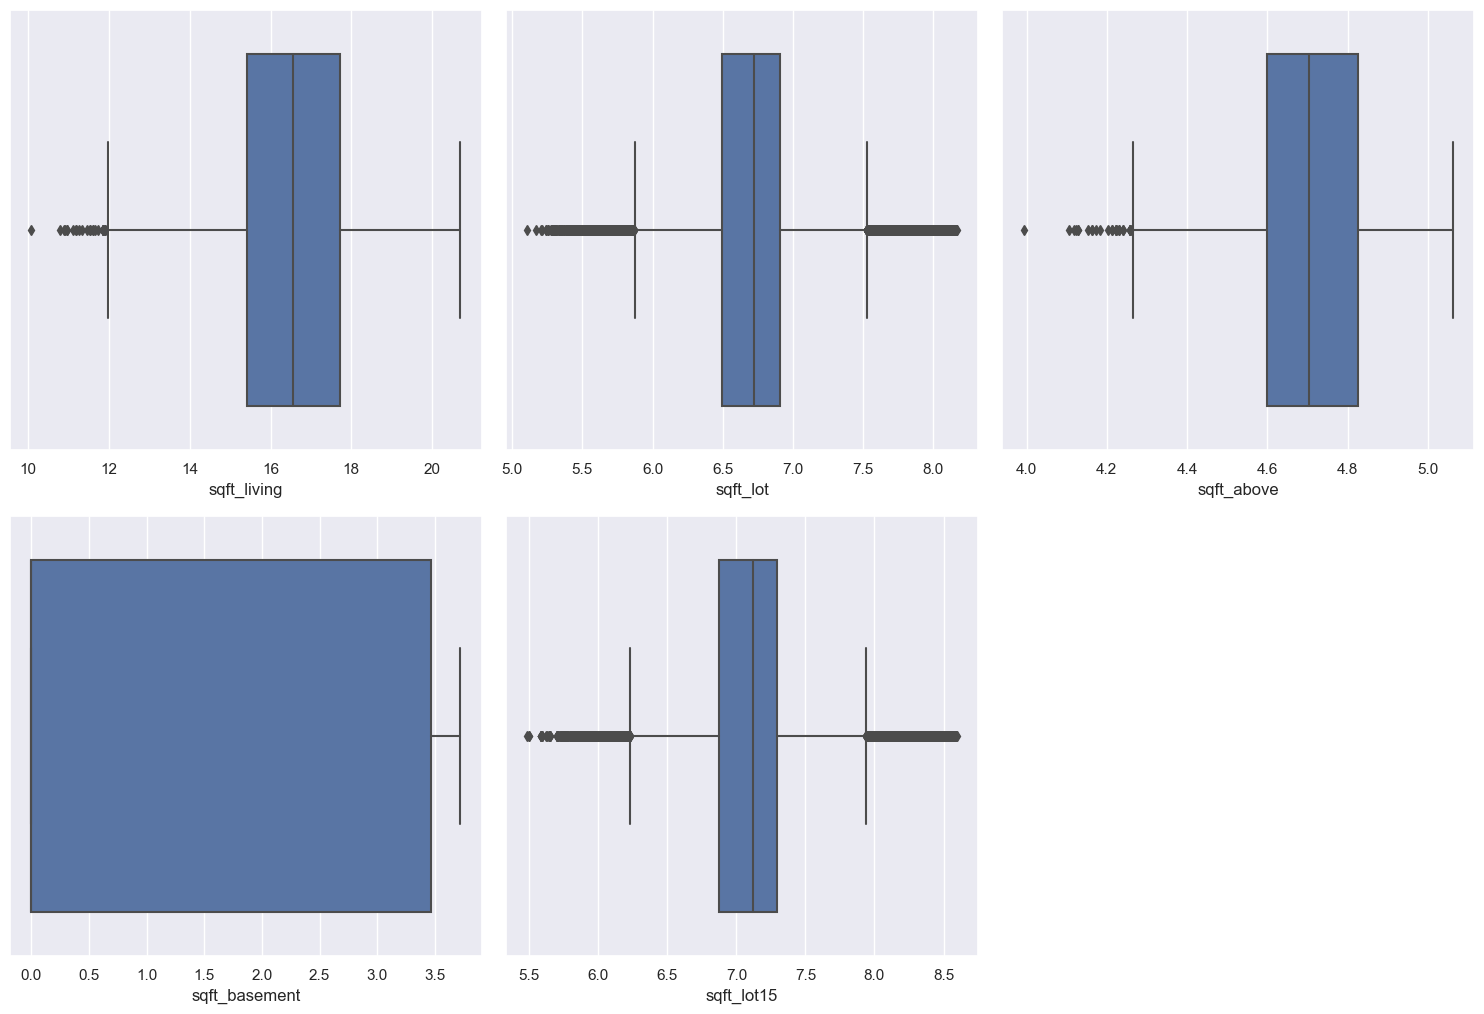

In [28]:
selected_columns=['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_lot15']
num_col=len(selected_columns)
num_rows=num_col+2//3
fig,axs=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
axs=axs.flatten()
for i,item in enumerate(selected_columns):
    sns.boxplot(data=data,x=data[item],ax=axs[i])
if num_col<len(axs):
    for i in range(num_col,len(axs)):
        fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

In [29]:
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,177.299912,5.400881e+05,3.359497,2.090638,16.563661,6.714473,1.493567,0.000057,0.113461,3.412774,7.641435,4.711975,1.366490,1971.005136,3.569318,98077.939805,1959.029470,7.102084
std,109.503659,3.671272e+05,0.873952,0.722182,1.653461,0.433455,0.538608,0.000652,0.427584,0.644513,1.123715,0.154247,1.702830,29.373411,16.986224,53.505026,630.881657,0.440407
min,0.000000,7.500000e+04,1.000000,0.000000,10.078979,5.108703,1.000000,0.000000,0.000000,2.000000,5.000000,3.992494,0.000000,1900.000000,0.000000,98001.000000,399.000000,5.486715
25%,81.000000,3.219500e+05,3.000000,1.750000,15.407732,6.492253,1.000000,0.000000,0.000000,3.000000,7.000000,4.600322,0.000000,1951.000000,0.000000,98033.000000,1490.000000,6.870569
50%,167.000000,4.500000e+05,3.000000,2.250000,16.566687,6.722154,1.500000,0.000000,0.000000,3.000000,7.000000,4.704612,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7.123528
75%,282.000000,6.450000e+05,4.000000,2.500000,17.711481,6.905910,2.000000,0.000000,0.000000,4.000000,8.000000,4.826833,3.461817,1997.000000,0.000000,98118.000000,2330.000000,7.296825
max,371.000000,7.700000e+06,6.000000,4.250000,20.704084,8.167487,3.000000,0.007542,2.000000,5.000000,11.000000,5.061488,3.721653,2015.000000,84.402258,98199.000000,4042.000000,8.594078


In [30]:
corr=data.corr(numeric_only=True)
corr

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
date,1.000000,-0.004649,-0.012968,-0.029217,-0.034360,-0.014353,-0.022466,0.001544,0.004489,-0.050863,-0.041275,-0.025936,-0.007644,-0.000471,-0.024362,0.001376,-0.031357,-0.016376
price,-0.004649,1.000000,0.311312,0.439480,0.527814,0.159137,0.255976,0.266369,0.205436,0.033806,0.596393,0.451937,0.186081,0.054012,0.126092,-0.053203,0.514059,0.152600
bedrooms,-0.012968,0.311312,1.000000,0.500245,0.623518,0.224889,0.184209,-0.005874,0.058152,0.019964,0.360403,0.524454,0.175728,0.173526,0.015165,-0.165526,0.400909,0.208107
bathrooms,-0.029217,0.439480,0.500245,1.000000,0.728695,0.056167,0.504989,0.041162,0.101116,-0.130614,0.630557,0.658896,0.168406,0.519345,0.042688,-0.206447,0.531373,0.057056
sqft_living,-0.034360,0.527814,0.623518,0.728695,1.000000,0.312837,0.359705,0.057465,0.146543,-0.053572,0.700318,0.839838,0.239507,0.344832,0.051648,-0.214382,0.708152,0.293754
sqft_lot,-0.014353,0.159137,0.224889,0.056167,0.312837,1.000000,-0.294455,0.083503,0.064623,0.104200,0.154370,0.285106,-0.029654,-0.042385,0.026216,-0.285200,0.364150,0.897317
floors,-0.022466,0.255976,0.184209,0.504989,0.359705,-0.294455,1.000000,0.023879,0.004990,-0.269970,0.459669,0.541144,-0.262961,0.489653,0.006565,-0.060011,0.272287,-0.277704
waterfront,0.001544,0.266369,-0.005874,0.041162,0.057465,0.083503,0.023879,1.000000,0.043263,0.018361,0.065047,0.043436,0.037751,-0.026161,0.093294,0.030285,0.081333,0.093487
view,0.004489,0.205436,0.058152,0.101116,0.146543,0.064623,0.004990,0.043263,1.000000,0.034699,0.147017,0.082566,0.147249,-0.055761,0.050707,0.068719,0.168983,0.061507
condition,-0.050863,0.033806,0.019964,-0.130614,-0.053572,0.104200,-0.269970,0.018361,0.034699,1.000000,-0.156793,-0.151421,0.141399,-0.371884,-0.060952,0.004467,-0.088187,0.104232


<Axes: >

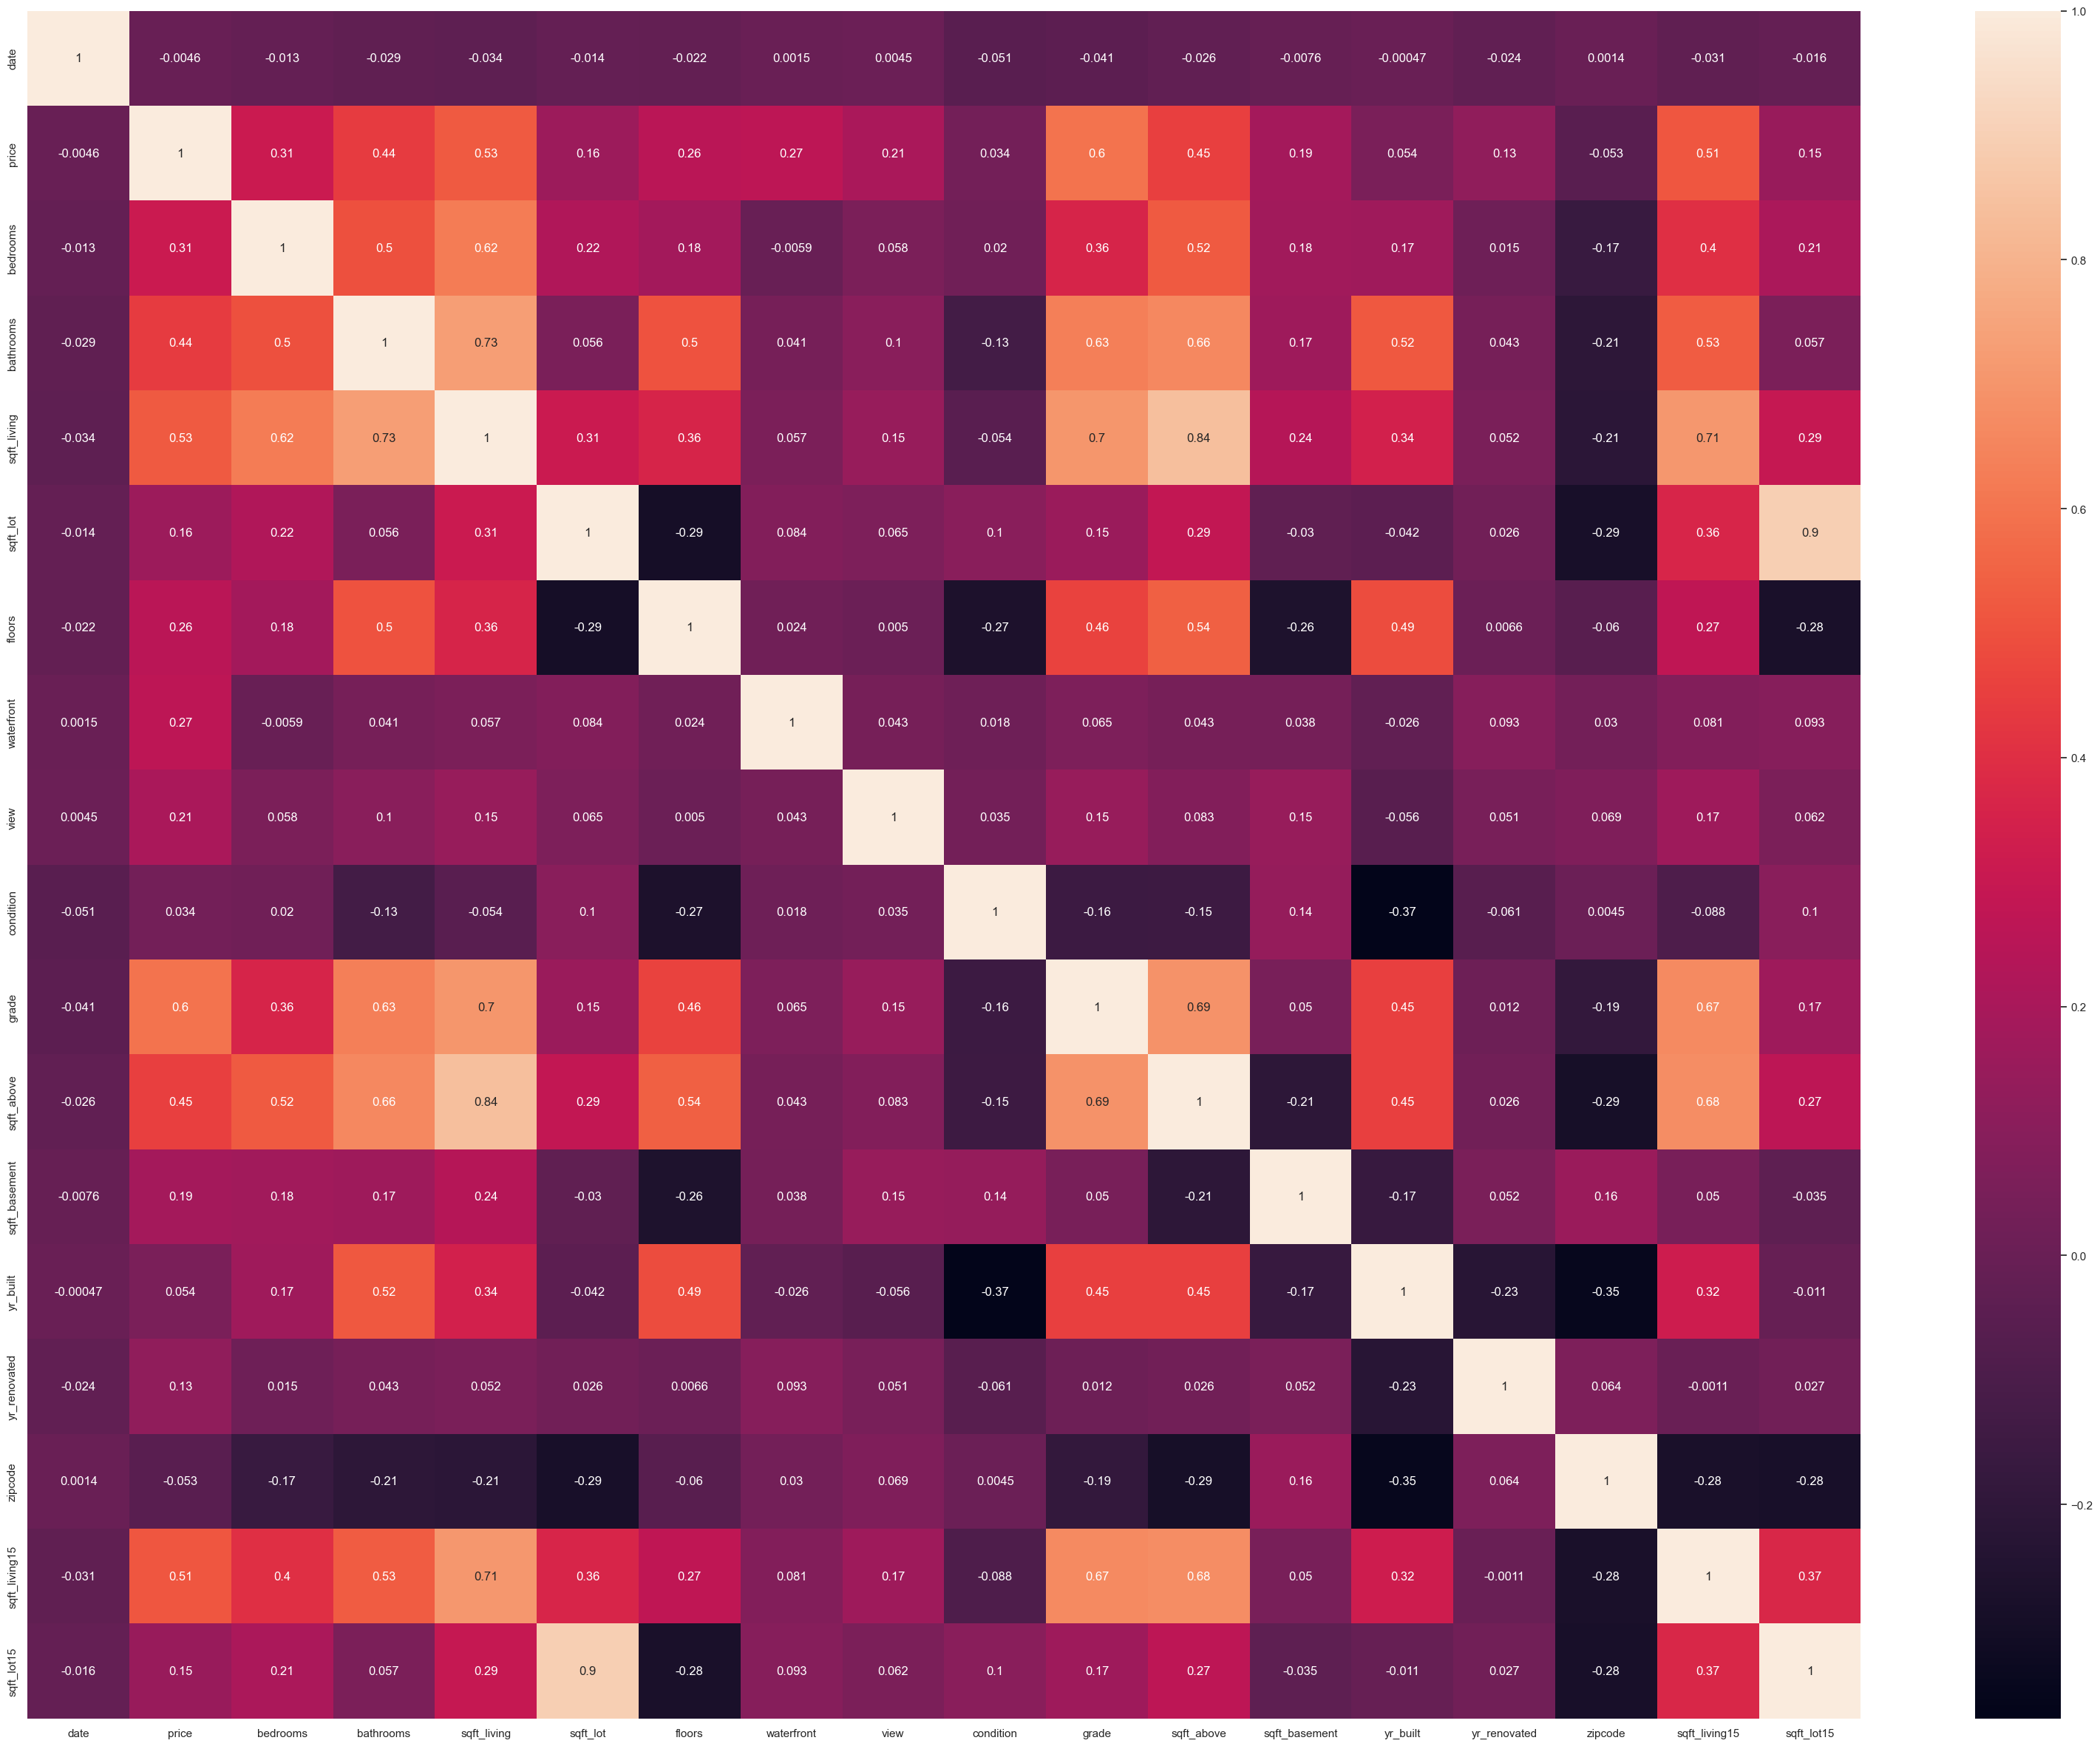

In [31]:
plt.figure(figsize=(40,30))
sns.heatmap(corr,annot=True)

## Correlation with target variables

Text(0.5, 1.0, 'Corelation with price')

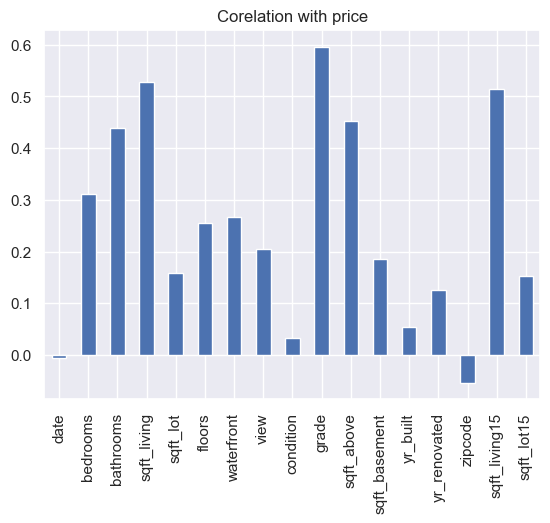

In [32]:
co_relation_values=data.drop('price',axis=1).corrwith(data['price'])
co_relation_values.plot(kind='bar')
plt.title('Corelation with price')

### Normalizing the data

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
for i in data:
    data[i]=mms.fit_transform(data[[i]])

In [34]:
data.head(15)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,0.442049,0.019266,0.4,0.235294,0.433547,0.473315,0.00,0.0,0.0,0.333333,0.333333,0.565501,0.000000,0.478261,0.0,0.893939,0.258304,0.466274
1,0.592992,0.060721,0.4,0.529412,0.727924,0.518383,0.50,0.0,0.0,0.333333,0.333333,0.780490,0.909744,0.443478,1.0,0.626263,0.354378,0.527253
2,0.781671,0.013770,0.2,0.235294,0.289397,0.575859,0.00,0.0,0.0,0.333333,0.166667,0.404288,0.000000,0.286957,0.0,0.136364,0.637112,0.538047
3,0.592992,0.069377,0.6,0.705882,0.620560,0.450850,0.00,0.0,0.0,1.000000,0.333333,0.522311,0.966199,0.565217,0.0,0.681818,0.263794,0.441287
4,0.762803,0.057049,0.4,0.470588,0.561862,0.538025,0.00,0.0,0.0,0.333333,0.500000,0.692263,0.000000,0.756522,0.0,0.368687,0.384573,0.523648
5,0.026954,0.150820,0.6,0.497590,0.643624,0.954685,0.00,0.0,0.0,0.333333,1.000000,0.970924,0.997144,0.878261,0.0,0.262626,0.435782,0.628906
6,0.150943,0.023934,0.4,0.529412,0.569615,0.507526,0.50,0.0,0.0,0.333333,0.333333,0.699481,0.000000,0.826087,0.0,0.010101,0.504804,0.504408
7,0.676550,0.028439,0.4,0.352941,0.396242,0.570686,0.00,0.0,0.0,0.333333,0.333333,0.525843,0.000000,0.547826,0.0,0.994949,0.343398,0.575085
8,0.913747,0.020262,0.4,0.235294,0.583681,0.523959,0.00,0.0,0.0,0.333333,0.333333,0.522311,0.952009,0.521739,0.0,0.732323,0.379083,0.539308
9,0.822102,0.032525,0.4,0.588235,0.606559,0.500517,0.50,0.0,0.0,0.333333,0.333333,0.733235,0.000000,0.895652,0.0,0.186869,0.546528,0.525432


## Train Test Split

In [35]:
X=data.drop('price',axis=1)
y=data['price']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
print('The shape of X_train is',X_train.shape)
print('The shape of y_train is',y_train.shape)
print('The shape of X_test is',X_test.shape)
print('The shape of y_test is',y_test.shape)

The shape of X_train is (17290, 17)
The shape of y_train is (17290,)
The shape of X_test is (4323, 17)
The shape of y_test is (4323,)


## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)
lr_model

LinearRegression()

In [39]:
y_test_predict=lr_model.predict(X_test)

In [40]:
print(y_test.values[:5])
print(y_test_predict[:5])

[0.02911475 0.19711475 0.06388197 0.07298361 0.09245902]
[0.02886717 0.05949196 0.05092291 0.06382244 0.09546713]


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=round(mean_absolute_error(y_test,y_test_predict),2)
mse=round(mean_squared_error(y_test,y_test_predict),2)
r2_scor=round(r2_score(y_test,y_test_predict),2)
print("Mean square error is ",mse)
print("Mean absolute error is ",mae)
print("R2 Score is ",r2_scor)

Mean square error is  0.0
Mean absolute error is  0.02
R2 Score is  0.5


### These metrics provide insights into the performance of our machine learning model. A lower MSE and MAE indicate better performance in terms of prediction accuracy, while a higher R2 score indicates that your model explains a larger proportion of the variance in the target variable.